# Imports

In [2]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import scipy as sp
import tensorflow
import keras
import tensorflow.keras
import sklearn as sk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [3]:
print(f"Python version: {sys.version}")
print(f"Tensor Flow Version: {tensorflow.__version__}")
print(f"Tensorflow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Python version: 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Tensor Flow Version: 2.0.0
Tensorflow Keras Version: 2.2.4-tf
Keras Version: 2.3.1
Scikit-Learn 0.24.2


# Data import

In [4]:
numpy.random.seed(1)
tensorflow.random.set_seed(1)

# Import dos dados de treinamento
dataset = tensorflow.keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = dataset.load_data(seed=1)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

In [5]:
# Criação de atributos para os inputs da rede
atrib = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dataframe = pd.DataFrame(train_data, columns=atrib)
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000
mean,3.595577,11.591584,11.035322,0.069307,0.554059,6.310631,68.482426,3.779059,9.623762,409.25495,18.496782,354.071931,12.448812
std,8.524506,23.676616,6.813216,0.254290,0.114267,0.698453,28.114483,2.094428,8.761354,168.28937,2.135036,95.241643,7.123851
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.00000,12.600000,0.320000,1.730000
25%,0.081348,0.000000,5.130000,0.000000,0.453000,5.897500,43.250000,2.106075,4.000000,279.00000,17.400000,374.052500,6.745000
50%,0.250895,0.000000,8.560000,0.000000,0.535000,6.243500,76.950000,3.167500,5.000000,334.00000,19.100000,391.190000,10.805000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.630250,94.100000,5.116700,24.000000,666.00000,20.200000,395.962500,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.00000,22.000000,396.900000,37.970000


In [6]:
# Pré-processamento dos dados
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data =  (test_data  - mean)  / std
dataframe = pd.DataFrame(train_data, columns=atrib)
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.416523,0.905322,-1.301339,-0.272888,-0.719025,0.771758,0.064729,-0.285089,-0.299841,-1.114076,-0.045387,0.450236,-0.691327
1,-0.419329,1.835661,-1.066210,-0.272888,-0.613878,0.552431,-0.430291,0.933650,-0.528400,-0.233548,-0.420552,0.450236,-0.740519
2,-0.395387,-0.490186,-0.606239,-0.272888,-0.929320,-0.402288,0.606046,0.913237,-0.756958,-1.048631,-0.279865,0.406503,0.892644
3,-0.415517,0.038415,-0.729682,-0.272888,-1.271048,-0.620182,-1.676745,1.299788,-0.642679,-0.382286,0.189092,0.442982,-0.611215
4,0.009707,-0.490186,1.038194,-0.272888,1.892133,-1.359874,0.987105,-0.800952,1.642904,1.527508,0.798736,0.280877,-0.317471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.243648,-0.490186,1.038194,3.664502,0.674177,0.533795,1.008473,-1.158007,1.642904,1.527508,0.798736,0.223478,-1.225408
400,-0.400987,-0.490186,-0.537170,-0.272888,-0.535017,0.093707,-0.505078,0.363958,-0.528400,-0.727358,0.517362,0.450236,-0.784088
401,-0.410561,-0.490186,-1.260191,-0.272888,-0.578829,0.361774,0.965737,-0.445570,-0.756958,-1.286612,-0.326761,0.450236,-0.951340
402,-0.246567,-0.490186,1.255688,-0.272888,2.777123,-1.299667,1.122434,-1.045713,-0.528400,-0.037214,-1.780528,-0.131113,0.116821


In [7]:
test_dataframe = pd.DataFrame(test_data, columns=atrib)
test_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.411433,0.947610,-0.726742,-0.272888,-1.060754,0.264295,-1.783583,0.818727,-0.299841,-0.477478,-1.123988,0.310523,-0.531103
1,-0.411665,1.412780,-1.116175,-0.272888,-1.025705,0.917976,-1.673183,1.291087,-0.528400,-0.066961,-1.546049,0.248183,-1.032858
2,-0.413042,-0.490186,0.263738,-0.272888,-1.025705,-0.053945,-2.225184,0.225850,-0.528400,-0.066961,0.095300,0.429421,-0.796738
3,-0.420553,2.892864,-1.326321,-0.272888,-1.043229,0.464987,-1.381157,2.182266,-0.642679,-0.769004,-0.701927,0.387580,-0.907770
4,-0.407332,0.778458,-0.897211,-0.272888,-1.104565,0.118077,-2.161081,1.556739,-0.414120,-0.650014,-0.889509,0.216960,-1.020208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.418149,2.892864,-1.086784,-0.272888,-1.420007,-0.623049,-1.758654,2.601181,-0.985516,-0.560771,-0.983301,0.432154,-0.449585
98,-0.411552,-0.490186,-0.033112,-0.272888,-1.235999,-0.352115,-2.161081,0.721013,-0.642679,-0.620266,0.329779,0.387265,-0.973828
99,0.267382,-0.490186,1.038194,-0.272888,1.217438,0.135279,0.979982,-1.004983,1.642904,1.527508,0.798736,0.450236,0.972756
100,-0.383503,-0.490186,-0.710577,-0.272888,-0.412345,-0.322011,-0.248665,-0.060788,-0.185562,-0.608367,-0.514344,0.238406,-0.220493


# Neural Network

In [8]:

# Definição do modelo
model = Sequential([Dense(32, activation=tensorflow.nn.relu, input_shape=(train_data.shape[1],)), Dense(32, activation=tensorflow.nn.relu), Dense(1)], name='rna')
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.002), loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "rna"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Treinamento da rede
history = model.fit(train_data, train_labels, epochs=600, batch_size=32, validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/600
323/323 [==============================] - 1s 2ms/sample - loss: 556.8198 - mae: 21.7279 - val_loss: 532.3686 - val_mae: 21.0049
Epoch 2/600
323/323 [==============================] - 0s 37us/sample - loss: 483.2234 - mae: 19.9660 - val_loss: 446.6012 - val_mae: 18.9500
Epoch 3/600
323/323 [==============================] - 0s 34us/sample - loss: 397.3378 - mae: 17.7855 - val_loss: 350.3325 - val_mae: 16.3672
Epoch 4/600
323/323 [==============================] - 0s 34us/sample - loss: 299.3157 - mae: 15.0088 - val_loss: 235.9257 - val_mae: 12.7955
Epoch 5/600
323/323 [==============================] - 0s 34us/sample - loss: 195.1884 - mae: 11.5944 - val_loss: 148.3257 - val_mae: 9.2043
Epoch 6/600
323/323 [==============================] - 0s 34us/sample - loss: 119.7827 - mae: 8.5570 - val_loss: 99.5681 - val_mae: 7.4039
Epoch 7/600
323/323 [==============================] - 0s 37us/sample - loss: 77.9423 - mae: 6.6532 - val_lo

# Gráficos

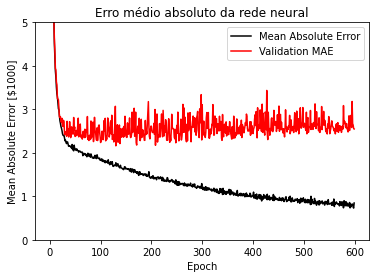

In [10]:
# Função para a criação do gráfico do erro médio absoluto e do erro médio quadrático
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [$1000]')

    plt.plot(history.epoch, numpy.array(history.history['mae']), 'k-', label='Mean Absolute Error',)
    plt.plot(history.epoch, numpy.array(history.history['val_mae']), 'r-' , label='Validation MAE')

    plt.legend()
    plt.title('Erro médio absoluto da rede neural')
    plt.ylim([0, 5])
    plt.show()

plot_history(history)

O erro médio absoluto em relação aos originais preços da casa é: $2246.23


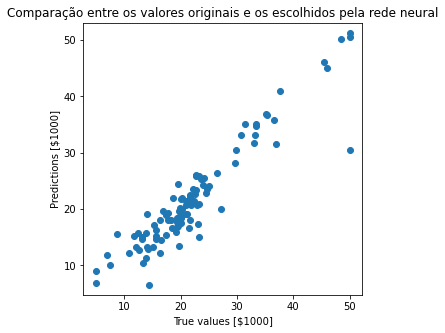

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1,
       25. ,  9.7, 23.9, 36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5,
       23.7, 28.5, 24.3, 23.8, 19.1, 28.4, 20.5, 33

In [11]:
mae = model.evaluate(test_data, test_labels, verbose=0)[1]
print("O erro médio absoluto em relação aos originais preços da casa é: ${:5.2f}".format(mae * 1000))

predictions = model.predict(test_data).flatten()
plt.subplots(figsize=(5, 5))
plt.scatter(test_labels, predictions)
plt.xlabel('True values [$1000]')
plt.ylabel('Predictions [$1000]')
plt.title('Comparação entre os valores originais e os escolhidos pela rede neural')
plt.axis('equal')
plt.show()
